# Welcome to Full Stack Machine Learning's Week 1 Project!

Welcome to our project on sentiment analysis using a [Women's Ecommerce Clothing Reviews Dataset from Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)! As a Data Scientist, you'll often be tasked with building predictive models that help businesses understand their customers' needs and preferences. In this project, our main goal is to understand the importance of creating a baseline model as a starting point for further improvements.

To achieve this goal, we'll be using a dataset containing reviews written by customers about women's clothing sold online. The dataset offers a great environment to parse out the text through its multiple dimensions, and because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with "retailer".

As part of the project, we'll start by exploring the dataset, performing some basic cleaning, and establishing a baseline model using a simple algorithm. We'll then discuss the importance of this baseline model and how it can be used as a reference point for future improvements.

Optionally, we'll also be creating a simple model that performs better than the baseline model. This will give us a better understanding of how machine learning models work and the benefits of using more complex algorithms.

We're excited to embark on this project together and look forward to exploring the world of sentiment analysis with you!

### Using GitHub
To complete the assignment:
1. Fill in the TODO sections of this notebook.
2. Push the results to your `full-stack-ml-metaflow-corise-week-1` repository.
3. Create a link to the repository in Corise.

## Task 1. EDA

Exploratory Data Analysis (EDA) is a critical step in the data science pipeline as it allows us to gain insights and identify patterns within the data. In this section, we will be performing EDA on the Women's Clothing E-Commerce dataset, which contains reviews written by customers. Through this process, we will be looking out for trends, anomalies, and outliers that can help us better understand the data and inform our decision-making in subsequent stages of the project. By performing EDA, we will be able to identify potential issues with the dataset and make necessary corrections before proceeding to the model building phase.

Suggestion: Spend 1-2 hours on this section.

### Import Dependencies
You can change these if you wish! 
These packages are already installed in the `full-stack-metaflow-corise` environment. 
If you are feeling adventurous, you can install other packages you want in the conda environment too, or even make your own environment from scratch and include with your submission! 

In [1]:
from collections import Counter
import pandas as pd
import numpy as np 
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import polars as pl

### Configure plots
This part is optional styling your plots and cards.

In [2]:
YELLOW = '#FFBC00'
GREEN = '#37795D'
PURPLE = '#5460C0'
BACKGROUND = '#F4EBE6'
colors = [GREEN, PURPLE]
custom_params = {
    'axes.spines.right': False, 'axes.spines.top': False,
    'axes.facecolor':BACKGROUND, 'figure.facecolor': BACKGROUND, 
    'figure.figsize':(8, 8)
}
sns_palette = sns.color_palette(colors, len(colors))
sns.set_theme(style='ticks', rc=custom_params)

### Load the data 

In [3]:
# TODO: Load the dataset, ensure to use index_col=0 when reading the CSV file. 
# Hints
    # Look in the ../../data directory of this worksapce. 
    # If you use pandas think about the index_col arg 🧐 
df = pl.read_csv('../data/women-clothing.csv')

# light data cleaning
df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
df= df.with_columns(pl.col('review_text').cast(pl.Utf8))


In [4]:
df.schema

{'': Int64,
 'clothing_id': Int64,
 'age': Int64,
 'title': Utf8,
 'review_text': Utf8,
 'rating': Int64,
 'recommended_ind': Int64,
 'positive_feedback_count': Int64,
 'division_name': Utf8,
 'department_name': Utf8,
 'class_name': Utf8}

In [5]:
df.groupby(pl.col('rating')).count().sort(pl.col('count'))

rating,count
i64,u32
1,842
2,1565
3,2871
4,5077
5,13131


### Plot the distribution of [1, 5] ratings

We will be using the `rating` to create a label on this dataset. We can see that the mean rating is above 4, pretty happy customers!

Let's try to visualise the distribution of the label. 

<BarContainer object of 5 artists>

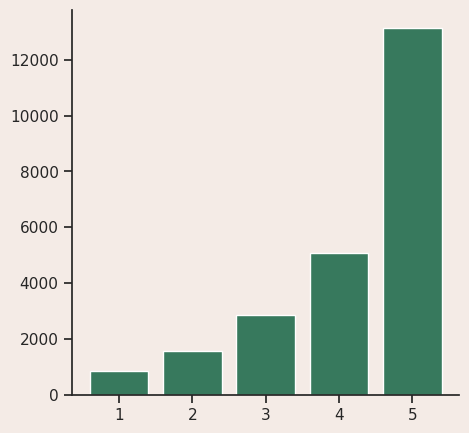

In [6]:
# TODO: Derive the rating_distribution and plot it
rating_distribution = df.groupby(pl.col('rating')).count()
fig, ax = plt.subplots(1,1,figsize=(5,5))
# You can swap the color used with the defined constants at the top of the notebook
ax.bar(x=rating_distribution.select(pl.col('rating')).to_series().to_list(),\
     height=rating_distribution.select(pl.col('count')).to_series().to_list(), color=GREEN)

In [7]:
df = df.filter(pl.col('review_text').is_not_null())
df = df.with_columns(pl.when(pl.col('rating') > 4).then(pl.lit(1)).otherwise(pl.lit(0)).alias('label').cast(pl.Int8))
assert df.select(pl.col('rating')).shape == df.select(pl.col('review_text')).shape
assert df.select(pl.col('review_text').is_null()).sum().item() == 0


#### What percentage of points does your algorithm label with positive sentiment?

In [8]:
labels = df.select(pl.col('label')).to_series()
reviews = df.select(pl.col('review_text')).to_series()
pct_positive_sentiment = labels.sum() / labels.shape[0]
print(f"{round(100*pct_positive_sentiment,3)}% of the labels have positive sentiment.")

55.386% of the labels have positive sentiment.


### Let us try to visualise the data that we just labeled depending on the rating. 

In a real world project, iterating at this point is crucial. You need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm. There are also automated tools to aid your label cleaning operations, such as [Cleanlab](https://github.com/cleanlab/cleanlab).  

In [9]:
# params
positive_color = 'green'
negative_color = 'red'
N = 10

# fetch subset of data
sub_labels = labels.sample(10, with_replacement=False, seed = 2)
sub_reviews = reviews.sample(10, with_replacement=False, seed = 2)


# print each sample and color the text by sentiment
for label, review in zip(sub_labels, sub_reviews):
    color = negative_color if label == 0 else positive_color
    print(colored(review, color), end='\n\n')

# in a real world project, iterating at this point is crucial.
# you need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm.
# there are also automated tools to aid your label cleaning operations, such as: https://github.com/cleanlab/cleanlab

Definitely size up...possibly two sizes. i can often wear an xs and the s is skin tight on me. other than that, it's a nice neutral piece.

I just bought this at the store. i simply couldn't resist! it is very light and comfortable and could easily be dressed up or dressed down, sandals and a crossbody bag for exploring the city, strappy healed sandals and some flashy jewelry for a garden party or day event, slip on booties and a cardigan for the evening. can't wait to rock it. in terms of sizing, i am 5'5 150 with 36dd bust and some hips and booty. usually i am a size 6-8/m in dresses and pants but in true retailer style, i ended up

Super soft, super cute but too short for a dress, too long and too overwhelming for a shirt, and didn't like the look with leggings at all so sadly i'm returning. love the colors, feel and style but no way will sizing up or down fit in a way that was functional...having said that..fits tts i guess.

Love the skirt, colors are nice, fabric is thick enough 

### What do you think about the text and their corresponding labels? 
- Do you think the labels fit the text? Yes
- If not what do you think we can do to fix it? Some have positive comments in the beginning but adding some context seems to be a negative comment. Can try to label after combining both the rating and likelihood of being positive / negative. 

### Filtering Stop Words
In this part we will be filtering the stop words from the reviews. We remove stopwords in NLP datasets because there are words that do not carry much meaning on their own, and their presence can add noise to the analysis. These words are common and frequently occurring words such as "a", "an", "the", "of", and "and". 

Removing stopwords can improve the accuracy and efficiency of natural language processing tasks, such as sentiment analysis or topic modeling, by reducing the dimensionality of the data and increasing the signal-to-noise ratio. By removing these uninformative words, the resulting dataset may contain more meaningful information that can be used for analysis.

In [10]:
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words("english"))
non_stopwords = []
for review in reviews: 
    for word in review.split():
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word == '':
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/workspace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Find the K most common words

In [11]:
K = 25
words, counts = zip(*Counter(non_stopwords).most_common(K))

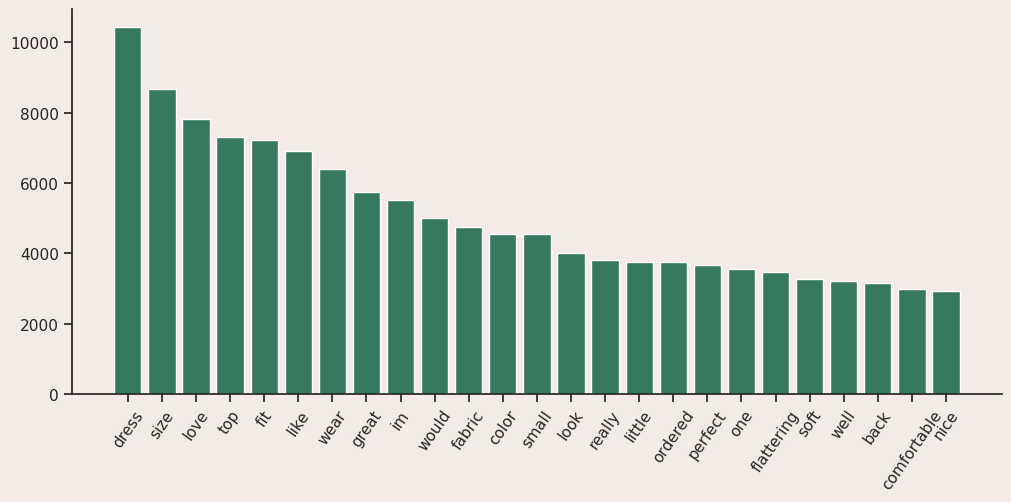

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.xticks(rotation = 55)
ax.bar(x=words, height=counts, color=GREEN);

### What do the other features in the data look like?

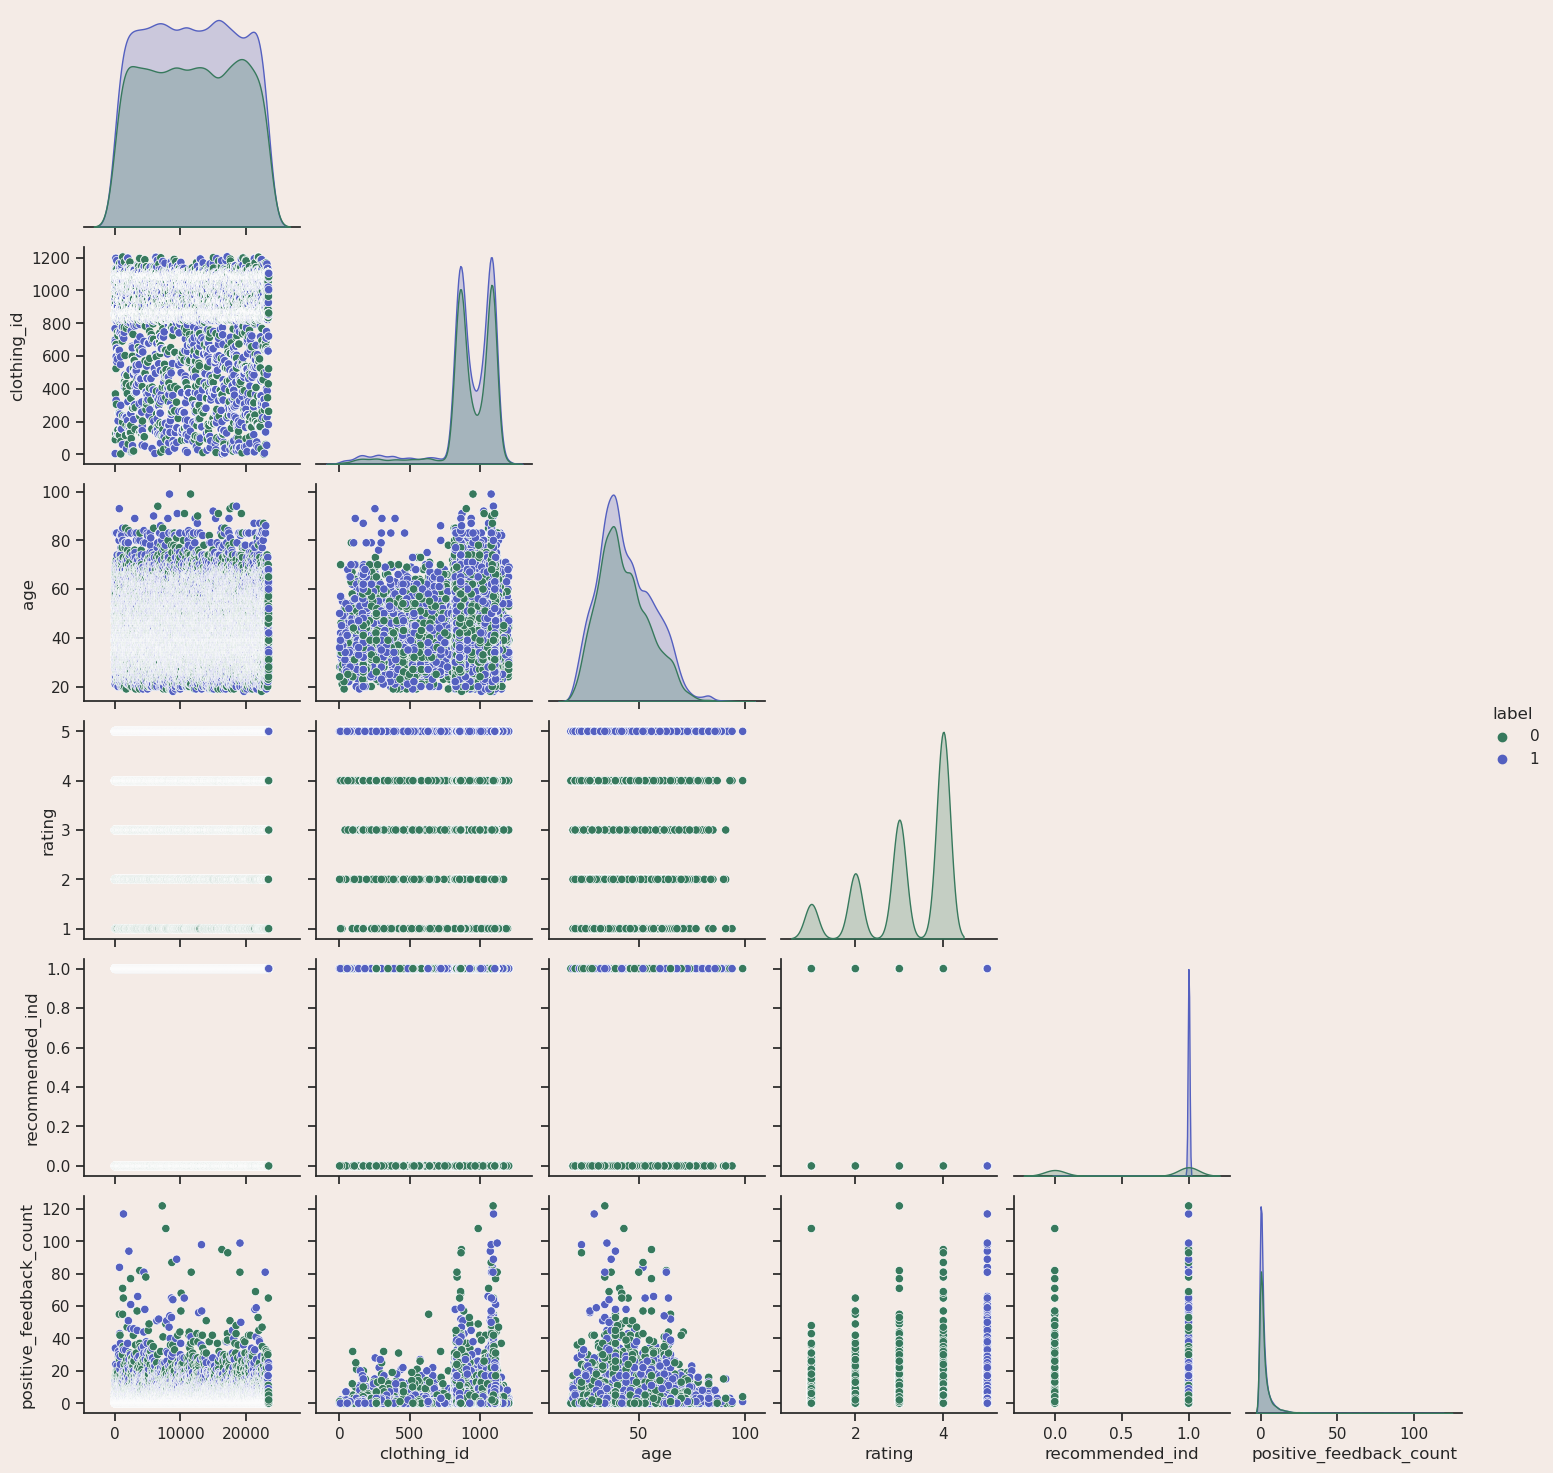

In [13]:
sns.pairplot(data=df.to_pandas(), hue='label', corner=True, palette=sns_palette);

## Task 2: Scoping Out a Machine Learning Project

Welcome to the Project Manager task for the sentiment analysis classifier project. As a Data Scientist, you know that a successful project requires not only technical skills but also effective project management. In this task, you will take on the role of a Data Scientist tasked with leading the development of a sentiment analysis classifier. You will be responsible for planning and executing the project, ensuring that it aligns with business goals, stays within scope, and delivers value to stakeholders.

To do this, you will create a one-page document that outlines the business value of the project, its scope, how to measure and monitor success, and when to quit. This task is designed to challenge you to think holistically about the project, and to consider not only the technical details but also the broader context in which the project is situated. Good luck!

Suggestion: Spend 1-2 hours on this section.

Fill in the section below with your answers!

### 1. The business value
* Improve customer satisfaction, which potentially leads to higher revenue
* Fast response to negative reviews and filter them out to figure the root causes / issues with the products.

### 2. The scope
* Sentiment analysis solely based on the postive reviews that are greater than 4 and negative reviews that are equal to or less than 4
* It does not include any steps priors to where the customers drop off or shipping / delivery related problems. 

### 3. How to measure success
* Have a weekly / monthly baseline sentiment analysis and compare it within the next couple months 
* Assign negative reviews with high likelihood to a human anotator and extract information => report it to the team. 

### 4. How to monitor success
* Improvement in ROC-AUC, Aaccuracy, PR-AUC, recall, precision compared to base line models or the models of the previous week / previous month
* Improvement in weekly / monthly profits after subtracting the costs. 

### Great job completing Task 2! 

Why do you think it is important to create a one-page document prior to beginning work on the project? 

## Task 3: Baseline Machine Learning Flow

A basic baseline in a machine learning model is the simplest possible model that can be used to make predictions on the dataset. The basic baseline can be as simple as predicting the most frequent class for a classification problem or the mean value of the target variable for a regression problem. The purpose of establishing a baseline is to provide a benchmark for evaluating the performance of more complex models. A model that cannot outperform the basic baseline is considered to be useless and should not be used in practice.

Here you will need to convert the code from above that was used to perform preprocessing and EDA on the dataset and create a Flow to run in order to train a baseline model. 

**NOTE:** It is important to realise that this is being run as a separate file and therefore re-using functions from above will not work. 

Suggestion: Spend 2-4 hours on this section. Rememeber that the more organized your earlier work is, the easier it is to write flows!

In [41]:
%%writefile baseline_flow.py 
from metaflow import FlowSpec, step, Flow, current, Parameter, IncludeFile, card, current
from metaflow.cards import Table, Markdown, Artifact


class BaselineNLPFlow(FlowSpec):

    # We can define input parameters to a Flow using Parameters
    # More info can be found here https://docs.metaflow.org/metaflow/basics#how-to-define-parameters-for-flows
    split_size = Parameter('split-sz', default=0.2)
    # In order to use a file as an input parameter for a particular Flow we can use IncludeFile
    # More information can be found here https://docs.metaflow.org/api/flowspec#includefile
    data = IncludeFile('data', default='../data/women-clothing.csv')

    @step
    def start(self):

        # Step-level dependencies are loaded within a Step, instead of loading them 
        # from the top of the file. This helps us isolate dependencies in a tight scope.
        import pandas as pd
        import io 
        from sklearn.model_selection import train_test_split
        import polars as pl 
        
        # load dataset packaged with the flow.
        # this technique is convenient when working with small datasets that need to move to remove tasks.
        df = pl.read_csv('../data/women-clothing.csv')

        # filter down to reviews and labels 
        df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
        df = df.with_columns(pl.col('review_text').cast(pl.Utf8).alias('reviews'))
        df = df.filter(pl.col('review_text').is_not_null())
        df = df.with_columns(pl.col('rating').apply(lambda score: 1 if score > 4 else 0).alias('labels'))
        self.df = df


        # split the data 80/20, or by using the flow's split-sz CLI argument
        _df = pd.DataFrame({'review': df.select(pl.col('reviews')).to_series().to_list(), \
                            'label': df.select(pl.col('labels')).to_series().to_list()})
        self.traindf, self.valdf = train_test_split(_df, test_size=self.split_size)
        print(f'num of rows in train set: {self.traindf.shape[0]}')
        print(f'num of rows in validation set: {self.valdf.shape[0]}')

        self.next(self.baseline)

    @step
    def baseline(self):
        "Compute the baseline"
        
        ### TODO: Fit and score a baseline model on the val data, log the acc and rocauc as artifacts.
        from sklearn.metrics import accuracy_score, roc_auc_score
        self.baseline_predictions = [1] * self.valdf.shape[0]
        self.base_acc = accuracy_score(self.valdf.label, self.baseline_predictions)
        self.base_rocauc = roc_auc_score(self.valdf.label, self.baseline_predictions)
        self.next(self.end)
        
    @card(type='corise') # TODO: after you get the flow working, chain link on the left side nav to open your card!
    @step
    def end(self):
        import numpy as np 
        import pandas as pd

        msg = 'Baseline Accuracy: {}\nBaseline AUC: {}'
        print(msg.format(
            round(self.base_acc,3), round(self.base_rocauc,3)
        ))

        current.card.append(Markdown("# Womens Clothing Review Results"))
        current.card.append(Markdown("## Overall Accuracy"))
        current.card.append(Artifact(self.base_acc))

        current.card.append(Markdown("## Examples of False Positives"))
        # TODO: compute the false positive predictions where the baseline is 1 and the valdf label is 0. 
        # TODO: display the false_positives dataframe using metaflow.cards
        # Documentation: https://docs.metaflow.org/api/cards#table
        tp = np.sum(self.valdf.label.iloc[np.where(self.valdf.label==1)])
        fp = np.sum(self.valdf.label.iloc[np.where(self.valdf.label==0)])
        current.card.append(
             Table.from_dataframe(pd.DataFrame({"TP": [tp], "FP": [fp] }))
                )

       
        
        current.card.append(Markdown("## Examples of False Negatives"))
        # TODO: compute the false positive predictions where the baseline is 0 and the valdf label is 1. 
        # TODO: display the false_negatives dataframe using metaflow.cards
        current.card.append(
             Table.from_dataframe(pd.DataFrame({"TN": [0], "FN": [0] }))
                )

if __name__ == '__main__':
    BaselineNLPFlow()

Overwriting baseline_flow.py


In [42]:
! python baseline_flow.py run

Metaflow 2.8.3.1+ob(v1) executing BaselineNLPFlow for user:sandbox
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
Including file ../data/women-clothing.csv of size 8MB 
2023-05-15 03:14:42.635 Workflow starting (run-id 15), see it in the UI at https://ui-pw-485289472.outerbounds.dev/BaselineNLPFlow/15
2023-05-15 03:14:42.811 [15/start/65 (pid 12884)] Task is starting.
2023-05-15 03:14:45.278 [15/start/65 (pid 12884)] num of rows in train set: 18112
2023-05-15 03:14:48.017 [15/start/65 (pid 12884)] num of rows in validation set: 4529
2023-05-15 03:14:48.203 [15/start/65 (pid 12884)] Task finished successfully.
2023-05-15 03:14:48.500 [15/baseline/66 (pid 12988)] Task is starting.
2023-05-15 03:14:53.153 [15/baseline/66 (pid 12988)] Task finished successfully.
2023-05-15 03:14:53.497 [15/end/67 (pid 13067)] Task is starting.
2023-05-15 03:14:55.317 [15/end/67 (pid 13067)] Baseline Accuracy: 0.556
2023-05-15 03:14:59.252 [15/end/67 (pid 13067)] Ba

### Great job completing Task 3!

The project for Week 1 is completed but you are free to try out Task 4 below if you have the time to do so! Remember that completing Task 4 is not a requirement and completely optional. So far we have got you already building basic Machine Learning Pipelines uing Metaflow, what do you think about it so far?

## Task 4: A Good First Machine Learning Model Flow(OPTIONAL)
### Great now that we have established a baseline score for our dataset, let's try to create an actual model for this. 

You are free to experiment and try to get a very high score in terms of model metrics such as Accuracy/AUC but bear in-mind that usually in the real-world we have to prioritise quick iterations in order to gather quick feedback. Its important to also think about how you will be serving the model as well, more complex DNN will require GPU's in order to perform inference whereas simpler models will work fine on CPU's. 

1. What model do you think would do a good enough job to get the ball rolling?
2. Try creating a `GoodFirstModelNLPFlow` Flow. 
3. Can you verify that the `GoodFirstModelNLPFlow` is indeed better than the `BaselineNLPFlow`? Metaflow has a Client API which you can use to assert that this more complex model is indeed better. You can refer to the documentation [here](https://docs.metaflow.org/metaflow/client). 
4. Did your `GoodFirstModelNLPFlow` do better than the `BaselineNLPFlow`? If yes, why do you think so? If not, what do you think was the reason?
5. Why do you think it is important to prioritise quick iterations when working on an ML project?